In [18]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import jax.numpy as jnp
from scipy.io import wavfile as wf

In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp1_sounds/

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp1_sounds


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
s1_file = "input/chopin-fantaisie-impromptu-op.wav"
s2_file = "input/scorch-fire.wav"

In [4]:
sampling_rate_1, s1 = wf.read(s1_file)
s1 = s1[:,0]

sampling_rate_2, s2 = wf.read(s2_file)
s2 = s2[:,0]
print(s1.shape, s2.shape)

(12390918,) (1554726,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_17596\1700381029.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_1, s1 = wf.read(s1_file)
C:\Users\TRETEC\AppData\Local\Temp\ipykernel_17596\1700381029.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_2, s2 = wf.read(s2_file)


In [5]:
S=[s1, s2]
S, X, Xw = mix_sources(S, normalise=False)
wf.write('./sound_mixture.wav', sampling_rate_2, X.mean(axis=0).astype(np.float32))

In [15]:
W,_ = fast_ica(Xw, 1, 1e-8, 5000) #Nour's method.

component 0
iteration : 0 : distance 0.03466677665710449
iteration : 1 : distance 2.1576881408691406e-05
iteration : 2 : distance 1.1920928955078125e-07
iteration : 3 : distance 1.1920928955078125e-07
component 1
iteration : 0 : distance 0.1398279070854187
iteration : 1 : distance 0.0


In [16]:
unMixed = np.dot(W,Xw)


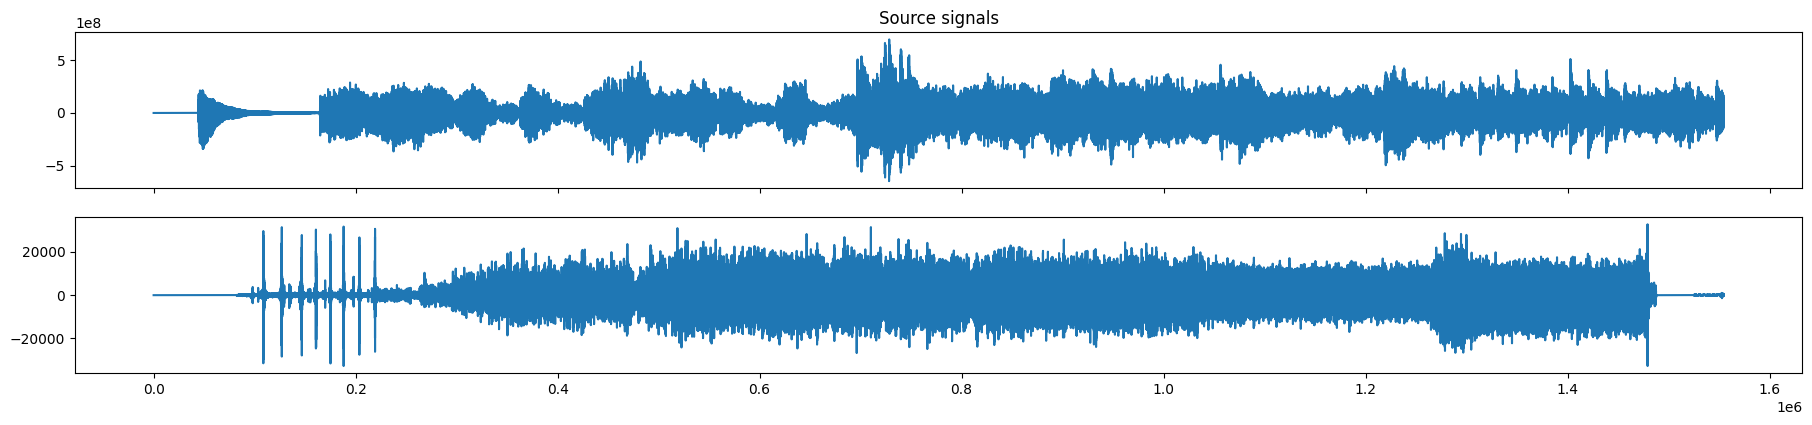

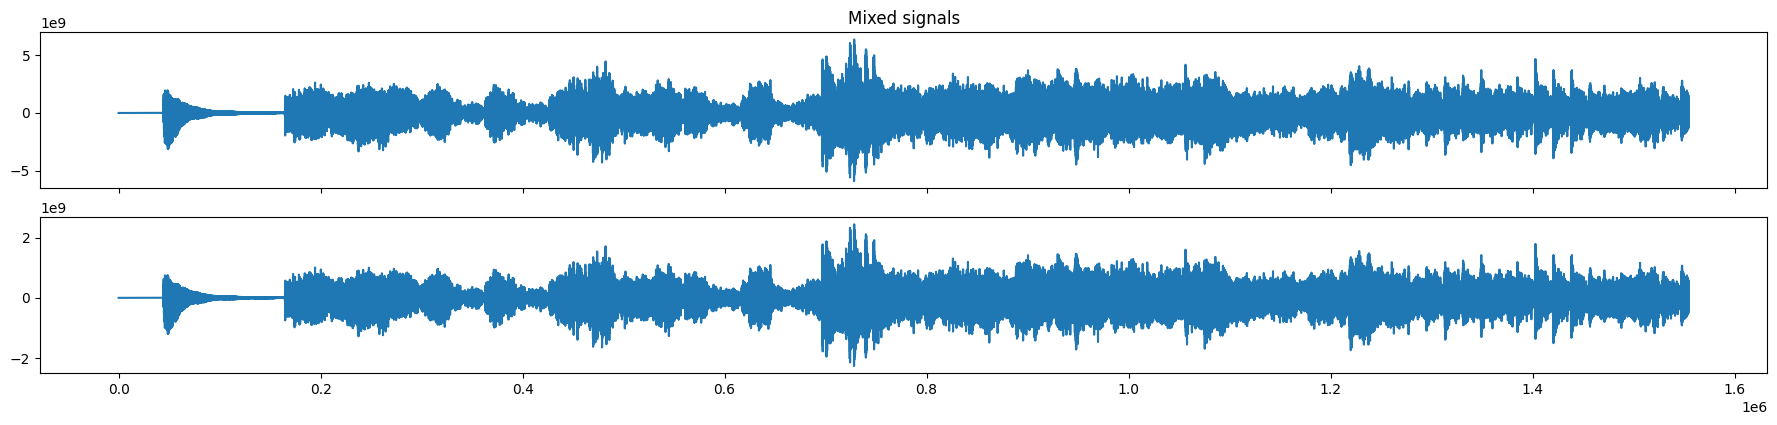

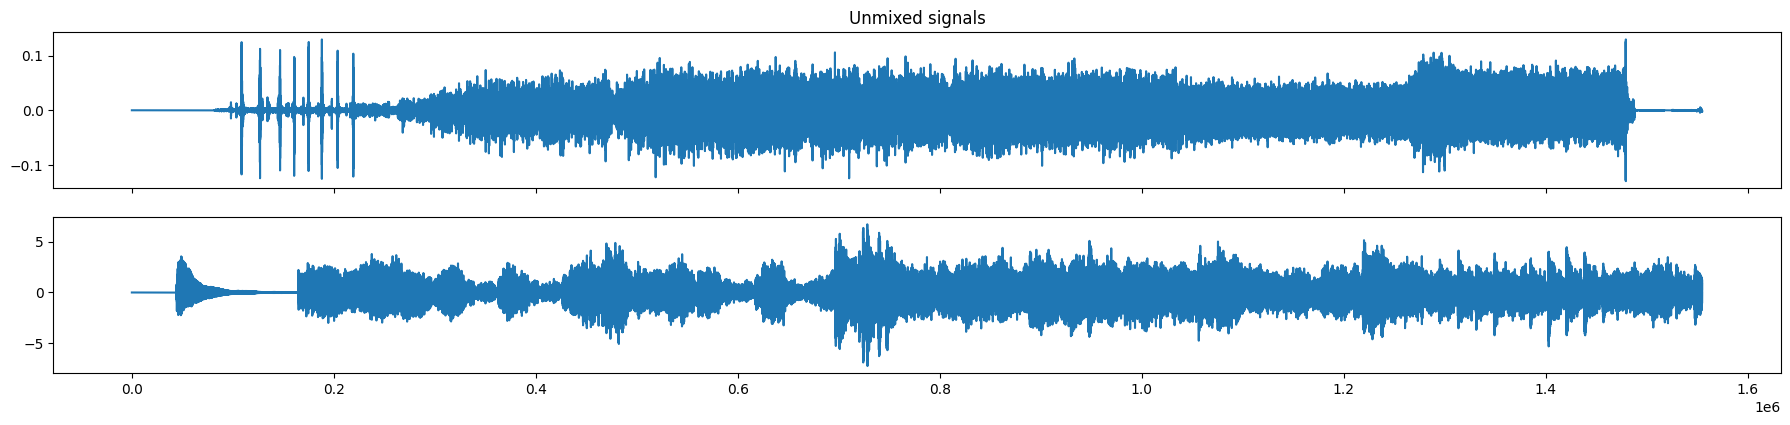

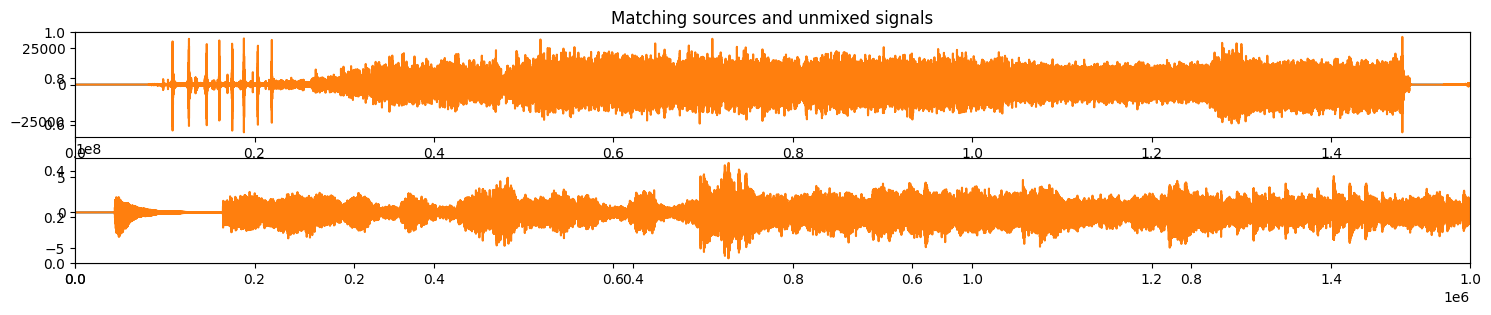

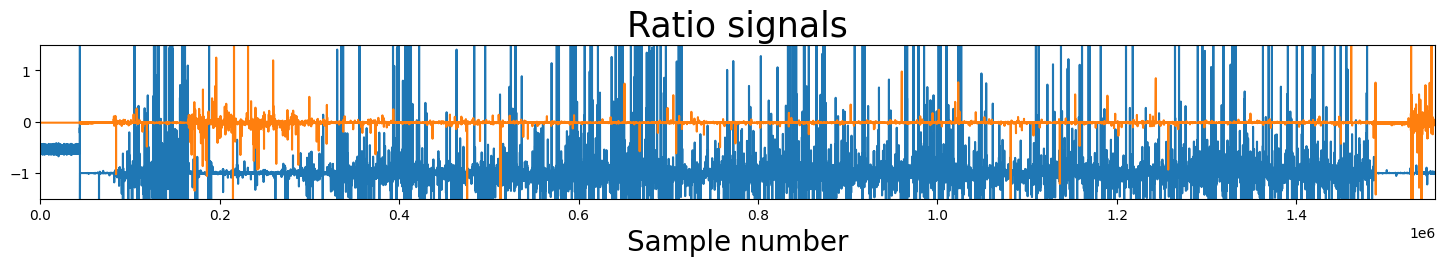

In [20]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)

Sw, _, _ = centering_and_whitening(S)
perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)

fig, ax = plt.subplots(1, 1, figsize=[18, 2])
for i in range(X.shape[0]):
    ax.plot(unMixed[perm[i]] / Sw[i], '-', label='Recovered signals')
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Ratio signals', fontsize=25)
ax.set_xlim(0, S.shape[1])
ax.set_ylim(-1.5, 1.5)
plt.show()

In [21]:
wf.write('output/s1_predicted.wav', sampling_rate_2, unMixed[0].astype(np.float32))
wf.write('output/s2_predicted.wav', sampling_rate_2, unMixed[1].astype(np.float32))

In [10]:
# # LaTeX code for the subplot
# subplot_code_ = r'''
# \nextgroupplot[
#         title=Evolution of MCC during FastICA algorithm iterations on synthetic data,
#         xlabel={iterations},
#         ylabel={MCC Score},
#         xmin=0, xmax=%d,
#         ymin=%f, ymax=%f
#         ]
# \addplot[
#     color=blue,
#     mark=*,
#     style={very thick},
# ] coordinates {
#     %s
# };
# ''' % (len(mcc)-1, min(mcc)-0.1, 1, ' '.join(f'({i},{score:.2f})' for i, score in enumerate(mcc)))

# # Save the LaTeX code to a file
# file_path = './figures_latex/mcc_sounds_fastica.tex'  # Path to save the .tex file
# with open(file_path, 'w') as file:
#     file.write(subplot_code_.strip())


ValueError: min() arg is an empty sequence